In [1]:
import sys
import os
import copy
from glob import glob
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.time import Time
import astropy.units as u
import astropy.constants as aconst
from astropy import stats
from astropy.io.ascii import latex

# Setting and imports to enable the display of plots and images in the notebook itself
%matplotlib inline
import IPython

In [2]:
os.environ['XUVTOP'] = '/melkor/d1/guenther/downdata/CHIANTI/'

import chianti.core as ch

 using cli
 using CLI for selections


In [3]:
datadir = '/melkor/d1/guenther/downdata/Chandra/RWaur/'
figout = '/melkor/d1/guenther/Dropbox/my_articles/RWAur/'

In [4]:
obsids = [14539, 17644, 17764, 19980]

\begin{abstract}
Young stars are variable objects on all time scales, as rotation, magnetic fields, outflows and their circumstellardisk interact. RW~Aur~A has seen a visual dimming event in 2011 lasting about half a year and more extreme dimming since 2014 of different magnitude. Visual and IR observations indicate that the cause for this dimming is a gray absorber, possibly located in or near the accretion disk that moved int othe line-of-sight. The dimming is also associated with changes in the outflow. We report on new \emph{Chandra} X-ray data taken in 2017, when the optical flux was almost 2~mag below the long-term average. The observed spectrum is highly absorbed by a column density of a few $10^{23}\;\mathrm{cm}^{-2}$, but shows significantly more hot plasma than in X-ray observations taken before the dimming. There is an emission feature at 6.6~keV, pointing to an Fe abundance an order of magnitude above solar, while previous X-ray data shows sub-solar Fe abundances. Comparing X-ray absorbing column density and optical reddening, we find that the gas-to-dust ratio in the absorber is orders of higher than in the ISM or that that absorber has undergone significant dust evolution. Given the high column density coupled with changes in the X-ray emission, it seems likely, that this absorber is located in the inner disk. We specualte, that a break-up of planetsismals or terrestial planets could supply large grains causing gray absorption; some of these grains would be accreted and enrish the stellar corona with iron to explain the observed abundace.

\end{abstract}

%% Keywords should appear after the \end{abstract} command. 
%% See the online documentation for the full list of available subject
%% keywords and the rules for their use.
\keywords{protoplanetary disks --- stars: individual (RW Aur) --- circumstellar matter --- stars: variables: T Tauri, Herbig Ae/Be --- stars: pre-main sequence}


## Introduction


The formation of stars and planetary systems from large-scale molecular clouds is a complicated process with many interacting components. After the inital collapse of the cloud, an accretion disk forms around the central proto-star.  Low mass stars ($<3\;M_{\odot}$) at this stage are called classical T Tauri stars (CTTS).
Circumstellar disks are the sites of planet formation, they regulate the angular momentum of the star, and they may lauch a disk wind. Typical disks contain a mass of $10^{-3}$ to $10^{-1}\,M_\odot$
and disperse within a few Myrs \citep[see review by][]{2014prpl.conf..475A}, which also sets the 
time-scale for planet formation. During their evolution disks undergo large structural changes. In particular, grains grow to larger sizes and larger grains to settle in the disk mid-plane leaving
a gas rich disk atmosphere behind \citep[see review by][]{2011ARA&A..49...67W}.

Gas comprises the majority of the mass in a protoplanetary disk and thus 
controls essential transport processes within the disk like
angular momentum redistribution and dust grain motion.
For example, gas affects grain growth through the coupling of
gas and dust dynamics \citep{1977MNRAS.180...57W,2001ApJ...557..990T}
as well as the thermal and chemical balance of the disk 
\citep[e.g.][]{2009A&A...501..383W}. 
Images of T~Tauri star disks often have asymmetries or gaps \citep{2015ApJ...808L...3A,2015MNRAS.453.1768P,2016ApJ...820L..40A}. Thus, the distribution of grain sizes in the stellar environment differs significantly for different sight lines.

X-rays and the UV emission from the star ionize the upper layers of the disk and in particular the inner disk edge. These ions couple to the magnetic field. On the disk surface, ions can be acelerated magneto-centrifugally into a disk wind, possibly dredging along dust particles from the disk. Outflows can be clumpy, presumably changing in response to the magnetic field or the stellar irradiation \citep{2012ApJ...758..100B,2014A&A...563A..87E}. The winds remove angular momentum and allow accretion to proceed. From the inner disk edge, gas is funneled onto the star. \citet{1994ApJ...429..781S} predict that this region can also be the source of an outflow, the so-called X-wind. 

Recent space-based monitoring campaigns with \emph{COROT}, \emph{K2}, and \emph{Spitzer} revealed many different types of variability in the lightcurves on time scales as short as hours. Of particular interest are stars with periodic or quasi periodic dips in their lightcurve \citep{2014AJ....148..122G,2015AJ....149..130S}. The best know star of this type is \object{AA Tau}. AA~Tau shows a recurring dip in the lightcurve with a periodicity every eight days; this dip is caused by increased reddening in the visual \citep{1999A&A...349..619B} and goes along with an increase in absorbing column density in X-rays \citep{2007A&A...462L..41S}; the ratio of visual extinction $A_V$ and absorbing column density $N_H$ indicates gas-rich material. The inner disk of \object{AA Tau} is seen very close to edge-on and the best explanation is that an asymmetric feature, such as a warp caused by a planet embedded in the disk, moves through our line-of-sight periodically. In addition, AA~Tau has shown a multi-year long dimming event where the visual extinction incrased by 4 magnitudes \citep{2013A&A...557A..77B} along with an increased X-ray absorbing column density \citep{2015A&A...584A..51S}. The duration of the event and the change in emission lines originating from the upper layers of the disk indicate a position in the disk at a few AU. This absorber has an ISM-like $A_V/N_H$ ratio.

In this paper we report on new observations of \object{RW Aur}. Like AA~Tau, RW~Aur has shown multiple optical dimming events. One occured in 2011 and lasted about half a year \citep{2013AJ....146..112R} with dimming of $\Delta m_V=2$~mag. Another dimming event started in mid-2014 with dimming of $\Delta m_V=3$~mag compared to the bright state. \citet{2015A&A...577A..73P} observed increased wind signatures during this time, but little change in accretion tracers. The stellar flux reached the bright state again in November and December of 2016 before plunging into a new dimming phase. RW~Aur has been observed in X-ray several times, but since it is a close binary separated by 1.4~arcsec \citep[semi-major axis 200~au, period 1000~years][]{2017arXiv170208583C}, \emph{Chandra} data is required to resolve the components. The first \emph{Chandra} observation was taken in 2013 \citep{2014ApJ...788..101S} when RW~Aur~A was in a bright state. \citet{2015A&A...584L...9S} obtained a second dataset, after RW~Aur became fainter in 2015. Here, we report on a third dataset observed in the most recent dimming event.

We first describe observations and data reduction in section~\ref{sect:obs} before we derive results in section~\ref{sect:results}. We discuss several scenarios to explain our findings in section~\ref{sect:discussion} and end with a short summary in section~\ref{sect:summary}.

In [5]:
from astropy import table

def read_lcs(obsid, source):
    lcall = Table.read(os.path.join(datadir, '{0}_{1}_lc.fits').format(obsid, source), hdu=1)
    lcsoft = Table.read(os.path.join(datadir, '{0}_{1}_lc_soft.fits').format(obsid, source), hdu=1)
    lchard = Table.read(os.path.join(datadir, '{0}_{1}_lc_hard.fits').format(obsid, source), hdu=1)
    lc = table.hstack([lcall, lcsoft, lchard], table_names=['all', 'soft', 'hard'], metadata_conflicts='silent')
    # time columns are the same for each lightcurve, so remove dublicate entries here for simplicity
    for c in lc.colnames:
        if (('TIME' in c) or ('AREA' in c) or ('EXPOSURE' in c)) and ('all' in c):
            lc.rename_column(c, c[:-4])
            lc.remove_columns([c[:-4] + '_soft', c[:-4] + '_hard'])
    ind  = lc['EXPOSURE'] > 0.
    return lc[ind]
    
lccurves = [[ read_lcs(obsid, t) for t in ['srca', 'srcb']] for obsid in obsids]
for list1 in lccurves:
    for lc in list1:
        lc['t'] = lc['TIME'] - lc['TIME'][0]

In [44]:
lccurves[0][0]

TIME_BIN,TIME_MIN,TIME,TIME_MAX,COUNTS_all,STAT_ERR_all,AREA,EXPOSURE,COUNT_RATE_all,COUNT_RATE_ERR_all,BG_COUNTS_all,BG_ERR_all,BG_AREA,BG_EXPOSURE,BG_RATE_all,NORM_BG_COUNTS_all,NORM_BG_ERR_all,NET_COUNTS_all,NET_ERR_all,NET_RATE_all,ERR_RATE_all,COUNTS_soft,STAT_ERR_soft,COUNT_RATE_soft,COUNT_RATE_ERR_soft,BG_COUNTS_soft,BG_ERR_soft,BG_RATE_soft,NORM_BG_COUNTS_soft,NORM_BG_ERR_soft,NET_COUNTS_soft,NET_ERR_soft,NET_RATE_soft,ERR_RATE_soft,COUNTS_hard,STAT_ERR_hard,COUNT_RATE_hard,COUNT_RATE_ERR_hard,BG_COUNTS_hard,BG_ERR_hard,BG_RATE_hard,NORM_BG_COUNTS_hard,NORM_BG_ERR_hard,NET_COUNTS_hard,NET_ERR_hard,NET_RATE_hard,ERR_RATE_hard,t
channel,s,s,s,ct,ct,pix2,s,ct / s,ct / s,ct,ct,pix2,s,ct / s,ct,ct,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct,ct,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct,ct,ct,ct,ct / s,ct / s,s
int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,474340400.855,474342200.855,474344000.855,46,6.78232998313,3.78448847324,2799.74608251,0.0164300613857,0.00242248039045,7.0,2.64575131106,25.9567100265,2799.74608251,0.0025002267326,1.02060004082,0.385750556583,44.9793999592,6.79329106486,0.0160655283135,0.00242639541753,27,5.19615242271,0.0096437316829,0.00185593702771,1.0,1.0,0.000357175247515,0.145800005832,0.145800005832,26.8541999942,5.19819753777,0.00959165552973,0.00185666749219,19,4.35889894354,0.00678632970278,0.00155689080905,6.0,2.44948974278,0.00214305148509,0.874800034992,0.357135618783,18.125199965,4.37350498459,0.00647387278376,0.00156210772538,0.0
2,474344000.855,474345800.855,474347600.855,51,7.14142842854,3.78448847324,3265.00997642,0.0156201666667,0.00218726082925,8.0,2.82842712475,25.9567100265,3265.00997642,0.00245022222222,1.16640004666,0.412384691283,49.8335999533,7.15332518019,0.0152629242524,0.00219090453991,32,5.65685424949,0.00980088888889,0.00173256874875,4.0,2.0,0.00122511111111,0.583200023328,0.291600011664,31.4167999767,5.66436497472,0.00962226768174,0.00173486911698,19,4.35889894354,0.00581927777778,0.00133503388199,4.0,2.0,0.00122511111111,0.583200023328,0.291600011664,18.4167999767,4.3686417302,0.00564065657063,0.00133801788103,3600.0
3,474347600.855,474349400.855,474351200.855,41,6.40312423743,3.78448847324,3265.00997642,0.0125573888889,0.00196113466228,7.0,2.64575131106,25.9567100265,3265.00997642,0.00214394444444,1.02060004082,0.385750556583,39.9793999592,6.41473331417,0.0122448017764,0.0019646902645,23,4.79583152331,0.00704438888889,0.00146885662156,2.0,1.41421356237,0.000612555555556,0.291600011664,0.206192345642,22.7083999883,4.80026200154,0.00695507828532,0.00147021357858,18,4.24264068712,0.005513,0.00129942656156,5.0,2.2360679775,0.00153138888889,0.72900002916,0.32601872416,17.2709999708,4.25514843554,0.00528972349107,0.00130325740695,7200.0
4,474351200.855,474353000.855,474354800.855,44,6.63324958071,3.78448847324,3265.00997642,0.0134762222222,0.00203161694103,9.0,3.0,25.9567100265,3265.00997642,0.0027565,1.31220005249,0.437400017496,42.6877999475,6.6476551336,0.0130743245061,0.00203602904175,19,4.35889894354,0.00581927777778,0.00133503388199,6.0,2.44948974278,0.00183766666667,0.874800034992,0.357135618783,18.125199965,4.37350498459,0.00555134596706,0.00133950738778,25,5.0,0.00765694444444,0.00153138888889,3.0,1.73205080757,0.000918833333333,0.437400017496,0.252533017845,24.5625999825,5.0063732307,0.00752297853909,0.00153334086783,10800.0
5,474354800.855,474356600.855,474358400.855,60,7.74596669241,3.78448847324,3265.00997642,0.0183766666667,0.00237241746529,6.0,2.44948974278,25.9567100265,3265.00997642,0.00183766666667,0.874800034992,0.357135618783,59.125199965,7.75419537091,0.0181087348559,0.00237493772666,25,5.0,0.0076569444444

## Observations and data reduction

\label{sect:obs}

In this paper we present new observations from three sources: \emph{Chandra} X-ray data, \emph{Chandra}/ACA visual monitoring and AAVSO long-term lightcurves extended into 2017.

### \emph{Chandra} X-ray data

RW~Aur has been observed with \emph{Chandra} four times. Details of the observations are listed in table~\ref{tab:obslog}. Observations are roughly taken two years apart, where the last observation is split into two orbits separated by two days. All processing is done with CIAO version 4.9 and CALDB 4.7.1. RW~Aur~B, the brigther member of the binary in X-rays, is bright enough to cause pile-up in about 10\% of the photons in the new observations; previous data were taken in a 1/8 sub-array mode that reduces the field-of-view and the frame time to alliviate this problem. However, for RW~Aur~A, the focus of this paper, pile-up is not significant in any of the observations. While a few weak sources are detected, only RW~Aur~B provides enough counts in all observations to accurately fit the position. We have thus shifted the coordinate systems of all observations to align RW~Aur~B with the known optical position. 

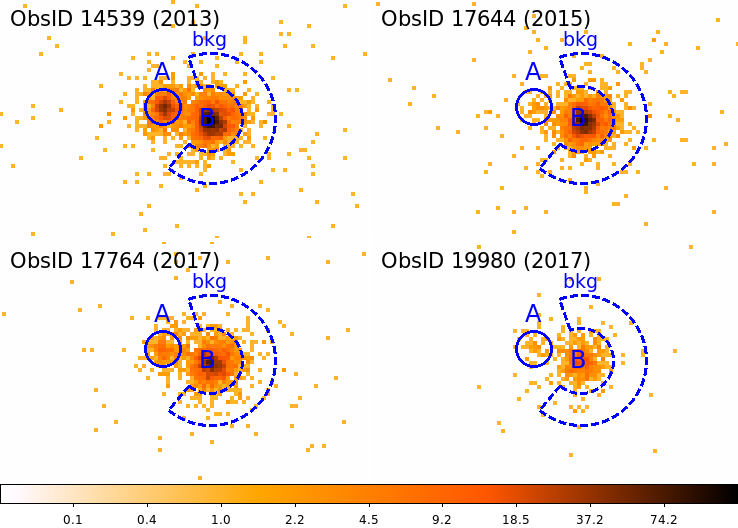

In [42]:
IPython.display.Image(filename=os.path.join(figout, 'regions.png'))

We limit our analysis to the energy band 0.3-9.0~keV. We define source and background regions as in \citet{2015A&A...584L...9S}; see figure~\ref{fig:regions}. Briefly, a circular source region with radius 0.54~arcsec (covering 75\% of the point-spread function - PSF) is placed on the peak of the X-ray emission for RW~Aur A and B. We measure the background flux from a large, source-free region on the same detector and found it to be nigligible. However, the wings of the PSF from the bright RW~Aur~B overlap with the source region of RW~Aur~A. Thus, we define an annulus centered on RW~Aur~B with and inner and outer radius 1 and 2~arcsec, respectively, which corresponds to the radii covered by the extraction region of RW~Aur~A. We remove a segment of $\pm60^\circ$ around the position of RW~Aur~A from this annulus and use the remaining area to extract a background lightcurve and spectrum. Table~\ref{tab:obslog} shows the number of counts detected in the RW~Aur~A source region and the expected number of counts due to contamination by RW~Aur~B in column ``bkg''. This is a small fraction except for ObsID~17644 (2015).
We verified that none of our conclusions depend sensitively on the extact placement of the extraction regions.

In [7]:
latex.latexdicts

{'AA': {'data_end': '\\hline',
  'header_end': '\\hline',
  'header_start': '\\hline \\hline',
  'tabletype': 'table'},
 'doublelines': {'data_end': '\\hline\\hline',
  'header_end': '\\hline\\hline',
  'header_start': '\\hline \\hline',
  'tabletype': 'table'},
 'template': {'caption': 'caption',
  'col_align': 'col_align',
  'data_end': 'data_end',
  'data_start': 'data_start',
  'header_end': 'header_end',
  'header_start': 'header_start',
  'preamble': 'preamble',
  'tablealign': 'tablealign',
  'tablefoot': 'tablefoot',
  'tabletype': 'tabletype',
  'units': {'col1': 'unit of col1', 'col2': 'unit of col2'}}}

In [8]:
# output->LaTeX
areafrac = lccurves[0][0]['AREA'][0]/lccurves[0][0]['BG_AREA'][0]

obstab = Table([obsids], names=['ObsID'])
obstab['ObsID'].format = '\\dataset[ADS/Sa.CXO\\#obs/{0}]{{{0}}}'
obstab['ObsID'].format = '\\dataset[{0}]{{ADS/Sa.CXO\\#obs/{0}}}'
obstab['Date'] = [lc[0].meta['DATE-OBS'][:10] for lc in lccurves]
obstab['MJD'] = [lc[0].meta['MJD_OBS'] for lc in lccurves]
obstab['MJD'].format = '{:7.1f}'
obstab['Exp. time'] = [lc[0].meta['TSTOP'] - lc[0].meta['TSTART'] for lc in lccurves]
obstab['Exp. time'].unit = 'ks'
obstab['Exp. time'] /= 1e3
obstab['Exp. time'].format = '{:4.1f}'
obstab['Mode'] = ['1/8 subarray'] *2 + ['full frame'] * 2

acounts = []
abkg = []
for o in obsids:
    acounts.append(len(Table.read(os.path.join(datadir, '{}_srca.fits'.format(o)), hdu=1)))
    abkg.append(len(Table.read(os.path.join(datadir, '{}_bkga.fits'.format(o)), hdu=1)))

obstab['RW Aur A'] = acounts
obstab['RW Aur A'].unit = 'counts'
obstab['bkg'] = np.array(abkg, dtype=float) * areafrac
obstab['bkg'].unit = 'counts'
obstab['bkg'].format = '%4.1f'

latexdict = copy.deepcopy(latex.latexdicts['AA'])
latexdict['tabletype'] = 'table*'
latexdict['caption'] = '\\label{tab:obslog} \emph{Chandra}/ACIS observations'
obstab.write(sys.stdout, format='ascii.latex', latexdict=latexdict)

\begin{table*}
\caption{\label{tab:obslog} \emph{Chandra}/ACIS observations}
\begin{tabular}{ccccccc}
\hline \hline
ObsID & Date & MJD & Exp. time & Mode & RW Aur A & bkg \\
 &  &  & $\mathrm{ks}$ &  & counts & counts \\
\hline
\dataset[14539]{ADS/Sa.CXO\#obs/14539} & 2013-01-12 & 56304.1 & 60.9 & 1/8 subarray & 801 & 22.3 \\
\dataset[17644]{ADS/Sa.CXO\#obs/17644} & 2015-04-16 & 57128.3 & 40.2 & 1/8 subarray & 44 & 20.1 \\
\dataset[17764]{ADS/Sa.CXO\#obs/17764} & 2017-01-09 & 57762.3 & 41.1 & full frame & 173 & 18.2 \\
\dataset[19980]{ADS/Sa.CXO\#obs/19980} & 2017-01-11 & 57764.1 & 14.5 & full frame & 36 & 4.5 \\
\hline
\end{tabular}
\end{table*}


### \emph{Chandra} optical data

\emph{Chandra} has a small optical telescope in the aspect control assembly (ACA). This is a CCD detector with a wide bandpass from about 0.4 to 1.1~$\mu$m. The color conversion to standard filters is not calibrated for stars of arbitrary spectral shape. Only a few regions on the CCD are read out and transmitted to the ground. One of these slots can be placed on the science target of the observation. This was done for ObsIDs 17644, 17767, and 19980. The image is intentionally defocussed and RW~Aur is not resolved. Essentially, aperture photometry is performed usign the CCD noise model, see \citet{2010ApJS..188..473N} for details.

### AAVSO data

We retrieved data for RW~Aur from the AAVSO database in four bands: Visual and standard $V$, $R$, and $I$ filters. Many observers with different instrumental set-ups contributed to this data collection.

## Results

In this section we present lightcurves and X-ray spectra and discuss spectral models, particularly for the new datasets.

### \emph{Chandra} lightcurves

In [9]:
lcaca = [Table.read(os.path.join(datadir, str(obsid), '0_{0}_lc.fits'.format(obsid)), hdu=1)
         for obsid in obsids[1:]]

In [50]:
lccurves[0][1]['NET_RATE_all','ERR_RATE_all']

NET_RATE_all,ERR_RATE_all
ct / s,ct / s
float64,float64
0.0375003727389,0.0036599572457
0.0330742491756,0.00318293211904
0.0370565815991,0.00336905562042
0.0324614050951,0.0031533228128
0.0318497151144,0.00312343280423
0.0385873934381,0.00343795960455
0.0398117832368,0.00349210404416
0.039198217844,0.00346513760861


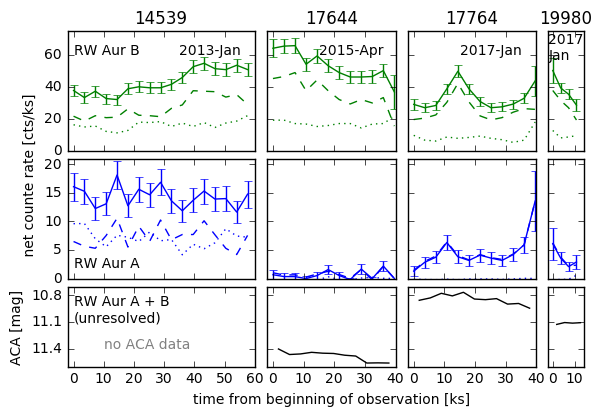

In [10]:
from matplotlib.ticker import MaxNLocator, MultipleLocator

fig = plt.figure()

width = np.array([lc[0]['t'][-1] for lc in lccurves])
width = width / width.sum() * 0.8  # last factor is scale factor to make space for label left of plot
ypos = [0.13, 0.35, 0.67]
dy = [0.2, 0.3, 0.3]
axes = []
for y in range(3):
    for x in range(4):
        kwargs = {}
        if y != 0:
            kwargs['sharex'] = axes[x]
        if x != 0:
            kwargs['sharey'] = axes[y * 4]
        axes.append(fig.add_axes((.1 + np.sum(width[0:x]) + x * 0.02, ypos[y], width[x], dy[y]), **kwargs))

for j in range(3):
    for i in [1, 2, 3]:
        plt.setp(axes[j * 4 + i].get_yticklabels(), visible=False)
        
for j in [1, 2]:
    for i in range(4):
        plt.setp(axes[j * 4 + i].get_xticklabels(), visible=False)
    
for i, obsid in enumerate(obsids):
    axes[1 * 4 + i].errorbar(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_all'] * 1e3, lccurves[i][0]['ERR_RATE_all'] * 1e3, 
                             label='0.3-9.0 keV', color='b')
    axes[1 * 4 + i].plot(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_soft'] * 1e3, 
                         color='b', ls=':', label='0.3-1.0 keV')
    axes[1 * 4 + i].plot(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_hard'] * 1e3, 
                         color='b', ls='--', label='1.0-9.0 keV')
    axes[2 * 4 + i].errorbar(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_all'] * 1e3, lccurves[i][1]['ERR_RATE_all'] * 1e3,
                             label='RW Aur B', color='g')
    axes[2 * 4 + i].plot(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_soft'] * 1e3, 
                         color='g', ls=':', label='_no_legend_')
    axes[2 * 4 + i].plot(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_hard'] * 1e3, 
                     color='g', ls='--', label='_no_legend_')
    axes[2 * 4 + i].set_title(obsid)
    if i > 0:
        axes[i].plot(lcaca[i-1]['time'] / 1e3, lcaca[i - 1]['mag'], color='k')
    
axes[8].yaxis.set_major_locator( MaxNLocator(nbins=4) )
axes[0].yaxis.set_major_locator( MaxNLocator(nbins=4) )
for i in [0, 1, 2, 3]:
    axes[i].xaxis.set_major_locator( MultipleLocator(10) )
    axes[i].set_xlim(-2, None)
axes[4].set_ylim(0, 0.021 * 1e3)
axes[8].set_ylim(0, 0.075 * 1e3)   
axes[0].invert_yaxis()
#axes[5].legend(fontsize=10, loc='upper left')
axes[4].set_ylabel('                    net counte rate [cts/ks]')
axes[1].set_xlabel('time from beginning of observation [ks]')
axes[0].set_ylabel('ACA [mag]')
axes[8].text(0., 60., 'RW Aur B')
axes[4].text(0, 2., 'RW Aur A')
axes[0].text(0, 11.1, 'RW Aur A + B\n(unresolved)')
axes[0].text(10, 11.4, 'no ACA data', color='0.5')
axes[8].text(35., 60, '2013-Jan')
axes[9].text(15, 60., '2015-Apr')
axes[10].text(15, 60., '2017-Jan')
axes[11].text(-2, 57., '2017\nJan')
fig.savefig(os.path.join(figout, 'lc.pdf'), bbox_inches='tight')

Figure~\ref{fig:lc} shows X-ray lightcurves for both components of the RW~Aur system and the ACA lightcurve where data exisist. RW~Aur~B shows X-ray activity in every observation, but the average fluxes are all similar. During the first observation, the flux increases smoothly by 30\% and decreases by a similar amount in the second observation. In 2015 there is a short flare in the hard band that lasts about 5~ks and a rise in the soft band just before the end of the exposure. The second observations in 2017 shows rapid decline of the hard X-ray flux, possibly the tail end of a flare. Note that the count rate in the soft band is lower for the later observations, because contamination builds up on \emph{Chandra}/ACIS detector and the effective area declines with time. This is properly taken into account when modelling the extracted spectra below. RW~Aur~A is fainter than RW~Aur~B in all observations. Significant variability within an observation is seen only towards the end of the first observation in 2017 when the flux above 1~keV triples. The count rate in 2015 is more than an order of magnitude below the value seen in 2013 before the dimming started. In the 2017 observations, the hard count rate reached about the pre-dimming level again, but essentially no signal is picked up at all in the soft band.

The ACA monitoring shows steady lightcurves with smooth variability on the 0.1~mag level during the observations and a difference of about 0.2~mag between the two obervations in 2017 which are about two days apart. This is consistent with variability typically seen when the accretion rate changes or accretion sports rotate in and out of view \citep{2016MNRAS.463.4459B}.

In [11]:
# Check if last bin in 17764 is responsible for an unsusually large fraction for 6.6 keV photons
srca = Table.read(os.path.join(datadir, '17764_srca.fits'), hdu=1)

(6000, 7000)

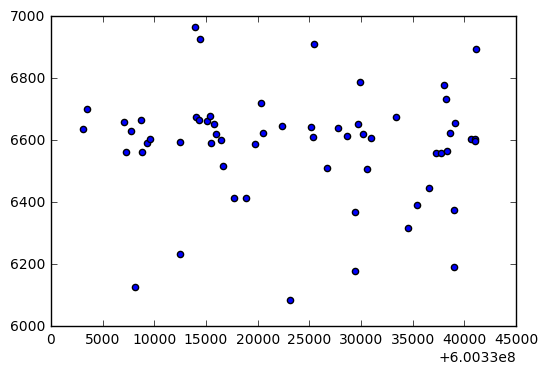

In [12]:
plt.scatter(srca['time'], srca['energy'])
plt.ylim(6000, 7000)

\textbf{Discuss and show spectrum of RW Aur B? It looks similar in all obs but is not discussed in detail in any previous publication. Also there is XMM data (unresolved) with a x 20 flare (from B?). That flare looks liek a flare should look - the spectrum hardenst, the 6.7 keV line appears etc.}

### Optical lightcurves

In [13]:
aavso = Table.read('aavsodata.txt', format='ascii', fill_values = ('N/A', 0))
# Sometimes the Magnitude column contains the "<" sing for upper limits.
aavso['Mag'] = np.zeros(len(aavso))
for i in range(len(aavso)):
    try:
        aavso['Mag'][i] = float(aavso['Magnitude'][i])
    except ValueError:
        aavso['Mag'][i] = np.ma.masked

In [14]:
bands = OrderedDict([('Vis.', {'color': (1., 0.5, 1.), 'marker': '.'}),
                     ('B', {'color': 'b', 'marker': 'p'}),
                     ('V', {'color': 'g', 'marker': 'o'}),
                     ('R', {'color': 'r', 'marker': '*'}),
                     ('ACA', {'color': 'k', 'marker': 'D', 'markersize': 7})
                    ])
def plotaavso(ax):
    for band in bands:
        ind = (aavso['Band'] == band)
        ax.plot(aavso['JD'][ind]-2400000.5, aavso['Mag'][ind], linestyle='None', **bands[band], label=band)

In [15]:
obstimes = [[Time(lc[0]['TIME_MIN'][0], format='cxcsec').mjd, 
             Time(lc[0]['TIME_MAX'][-1], format='cxcsec').mjd] for lc in lccurves]
# Add Chandra ACA magnitudes
aavso.add_row({'JD': Time(lccurves[1][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 11.5, 'Band': 'ACA'})
aavso.add_row({'JD': Time(lccurves[2][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 10.9, 'Band': 'ACA'})
aavso.add_row({'JD': Time(lccurves[3][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 11.1, 'Band': 'ACA'})

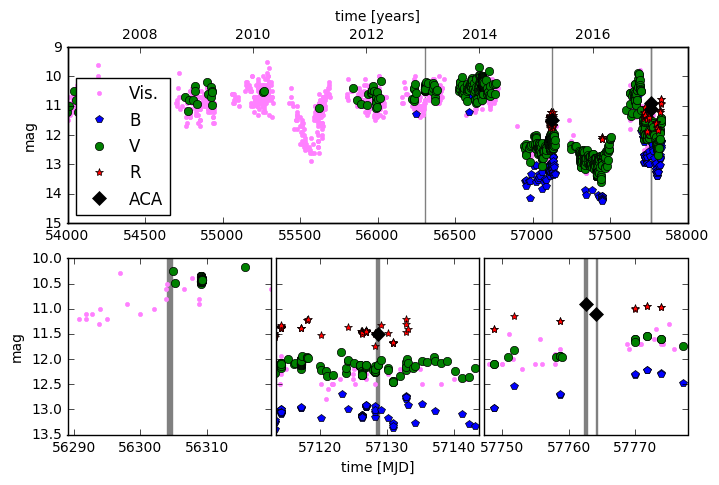

In [16]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(8,5))
ax11 = fig.add_subplot(211)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235, sharey=ax21)
ax23 = fig.add_subplot(236, sharey=ax21)

# Set up second x-axis for top plot that is labeled in years
ax11years = ax11.twiny()

def years(tmjd):
    return Time(tmjd, format='mjd').decimalyear

def update_ax11years(ax11):
   y1, y2 = ax11.get_xlim()
   ax11years.set_xlim(years(y1), years(y2))
   ax11.figure.canvas.draw()

# automatically update ylim of ax2 when ylim of ax1 changes.
ax11.callbacks.connect("xlim_changed", update_ax11years)

for ax in fig.axes:
    plotaavso(ax)
    
for ax in fig.axes:
    for i in range(4):
        ax.bar(obstimes[i][0], height=10, width=obstimes[i][1]-obstimes[i][0], bottom=8, align='edge', 
               color='0.5', edgecolor='0.5')
    
ax11.invert_yaxis()
ax11.set_xlim([54000, 58000])
dtime = 15.
for i, ax in enumerate([ax21, ax22, ax23]):
    ax.set_xlim(obstimes[i][0] - dtime, obstimes[i][1] + dtime)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_locator( MaxNLocator(nbins=4, steps=[1, 5, 10]) )
plt.setp(ax22.get_yticklabels(), visible=False)
plt.setp(ax23.get_yticklabels(), visible=False)

fig.subplots_adjust(wspace=0.02)

ax11.legend(numpoints=1, loc='lower left')
ax11.set_ylabel('mag')
ax21.set_ylabel('mag')
ax22.set_xlabel('time [MJD]')
ax11years.set_xlabel('time [years]')

ax21.set_ylim([13.5, 10])
ax11.set_ylim([15, 9])
fig.savefig(os.path.join(figout, 'opticallc.pdf'), bbox_inches='tight')

Figure~\ref{fig:opticallc} shows a long-term lightcurve of the RW~Aur system. The first \emph{Chandra} observation (marked by the first gray vertical line in figure~\ref{fig:opticallc}) took place in a bright state which had been the long-term average for many years with $m_V\approx 10.5$~mag. The second \emph{Chandra} dataset was taken in an obscured state with $m_V=12$~mag in 2015. At the end of 2016, RW~Aur briefly reached a bright state again, before fading back to $m_V=11.7$ during the \emph{Chandra} observations in 2017. Unfortunately, there is gap in the optical data of a few days right around the \emph{Chandra} observation. However, while RW~Aur is known to have some variation on time scales of days and hours \citep{2016MNRAS.463.4459B}, the lightcurve around the 2017 observations seems relatively smooth and the ACA lightcurves do not indicate significant variability within an observation (Figure~\ref{fig:lc}), so we interpolate the optical lightcurves to obtain values during the \emph{Chandra} observation (table~\ref{tab:BVR}). In 2015, there are observations within a few hours of the \emph{Chandra} data in all bands. In all cases, the uncertainty is dominated by the variability of the target and we estimate the error on the optical magnitudes to 0.2~mag. Within this uncertainty, RW~Aur is brigher by 0.5~mag in $B$, $V$, $R$, and the ACA band during the 2017 \emph{Chandra} observation, compared with 2015. We do not see significant changes in the optical color between those observations.

None of the optical data presented here resolves the RW~Aur system. \citet{2015IBVS.6126....1A} show that RW~Aur~B is also variable, but to a much lesser degree. Comparing observations from 1994 and 2014 they find that RW~Aur~B has become brigther by about 0.7~mag with almost constant color. They suggest this to be due to a dust cloud with large grains, analoguous to what is discussed for RW~Aur~A. We assume that this evolution is slow and subtract the long-term average of the RW~Aur~B fluxes (table~\ref{tab:BVR}) to obtain the flux of RW~Aur~A. Within the uncertainties, we do not see changes in color. On the other hand, changes in $B-V$ color up to about 0.3~mag are also possible.

In [17]:
# output->LaTeX

def mA(mAB, mB):
    return -2.5 * np.log10(10**(-mAB/2.5) - 10**(-mB/2.5))

def sigma_mA(mAB, mB, sig_AB, sig_B):
    nominator = sig_AB**2*10.**(-0.8*mAB) + sig_B**2 * 10.**(-0.8*mB)
    demoninator = 10.**(-mAB/2.5) - 10.**(-mB/2.5)
    return np.sqrt(nominator) / demoninator

tab = Table()
tab['band'] = ['B', 'V', 'R']
tab['$m_B$'] = np.array([14.5, 13.2, 12.3])
tab['$\sigma_B$'] = 0.3
tab['$m_{AB}$ 2015'] = np.array([13., 12.2,11.5])
tab['$m_{AB}$ 2017'] = np.array([12.5,11.7, 11.2])
tab['$\sigma_{AB}$'] = 0.2
tab['$m_{A}$ 2015'] = mA(tab['$m_{AB}$ 2015'], tab['$m_B$'])
tab['$\sigma_A$ 2015'] = sigma_mA(tab['$m_{AB}$ 2015'], tab['$m_B$'], tab['$\sigma_{AB}$'], tab['$\sigma_B$'])
tab['$m_{A}$ 2017'] = mA(tab['$m_{AB}$ 2017'], tab['$m_B$'])
tab['$\sigma_A$ 2017'] = sigma_mA(tab['$m_{AB}$ 2017'], tab['$m_B$'], tab['$\sigma_{AB}$'], tab['$\sigma_B$'])
for col in tab.columns:
    if col != 'band':
        tab[col].format = '{:3.1f}'
        
latexdict = copy.deepcopy(latex.latexdicts['AA'])
latexdict['tabletype'] = 'table*'
latexdict['caption'] = '\\label{tab:BVR} Optical flux (in mag) for RW~Aur.'
   
tab.write(sys.stdout, format='ascii.latex', latexdict=latexdict)

\begin{table*}
\caption{\label{tab:BVR} Optical flux (in mag) for RW~Aur.}
\begin{tabular}{cccccccccc}
\hline \hline
band & $m_B$ & $\sigma_B$ & $m_{AB}$ 2015 & $m_{AB}$ 2017 & $\sigma_{AB}$ & $m_{A}$ 2015 & $\sigma_A$ 2015 & $m_{A}$ 2017 & $\sigma_A$ 2017 \\
\hline
B & 14.5 & 0.3 & 13.0 & 12.5 & 0.2 & 13.3 & 0.3 & 12.7 & 0.2 \\
V & 13.2 & 0.3 & 12.2 & 11.7 & 0.2 & 12.8 & 0.4 & 12.0 & 0.3 \\
R & 12.3 & 0.3 & 11.5 & 11.2 & 0.2 & 12.2 & 0.5 & 11.7 & 0.4 \\
\hline
\end{tabular}
\end{table*}


### X-ray spectra

We will first fit a spectral model to the new \emph{Chandra} data from 2017 and then compare to the previous datasets. For consistency with previous work, we use the abundance table from \citet{1998SSRv...85..161G} as baseline throughout this paper. Uncertainties in this section are given as 90\% confidence ranges.


#### \emph{Chandra} data from 2017
\label{sect:2017}

Both datasets observed in 2017 are fitted to the same model using ungrouped data and the Cash statistic \citep{1979ApJ...228..939C}. We restrict the fit to the spectral region between 3 and 9~keV, where the background is nigligible (see below).

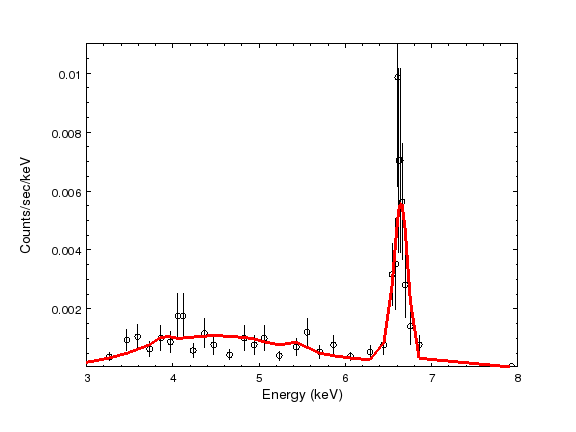

In [18]:
IPython.display.Image(filename=os.path.join(figout, 'spec_17.png'))

In [19]:
import json
def read_json_fit_results(filename):
    with open(os.path.join(figout, filename)) as f:
        fit = json.load(f)
    for n in fit.keys():
        fit[n] = np.array(fit[n])
    for c in ['val', 'up', 'down']:
        for i in range(len(fit[c])):
            if fit[c][i] is None:
                fit[c][i] = np.nan

    normem = 4 * np.pi * u.pc.to(u.cm)**2 * 140**2 * 1e14 * 1e-52
    for i in range(len(fit['name'])):
        if 'norm' in fit['name'][i]:
            for n in ['val', 'up', 'down']:
                fit[n][i] = fit[n][i] * normem
    return fit

def display_json_fit_results(filename):
    fit = read_json_fit_results(filename)
    for i in range(len(fit['name'])):
        if ('norm' not in fit['name'][i]):
            print('{0}: {1:6.4f} + {2:6.4f} {3:6.4f}'.format(fit['name'][i],
                                                                                        fit['val'][i],
                                                                                        fit['up'][i],
                                                                                        fit['down'][i]))
    for i in range(len(fit['name'])):
        if 'norm' in fit['name'][i]:
            print('{0} turned into EM in units of 1e52: {1:3.1f} + {2:3.1f} {3:3.1f}'.format(fit['name'][i],
                                                                                        fit['val'][i],
                                                                                        fit['up'][i],
                                                                                        fit['down'][i]))

In [20]:
display_json_fit_results('spec_fe.json')

a1.nH: 38.2038 + 6.7764 -9.3050
v1.kT: 1.1546 + 0.8982 -0.1544
v1.Fe: 10.0902 +    nan -7.6329
v1.norm turned into EM in units of 1e52: 151.0 + 140.4 -131.4


We fit a single optically thin, thermal emission APEC model \citep{2012ApJ...756..128F} and a cold photoelectric absorber. Figure~\ref{fig:spec_17} shows the data and the best-fit model. A key feature is the emission around 6.6~keV. This region is dominated by a complex of unresolved iron emission lines in the ionization stages Fe~{\sc xxii} to Fe~{\sc xxv}. The He-like triplet of Fe~{\sc xxv} at 6.7~keV dominates the emission if enough hot plasma (peak formation temperature for the lines is $\mathrm{k}T=5.5$~keV, where k is the Boltzmann constant) is present. The lower ionization stages have weaker lines, many of which are located at slightly lower energies. The peak of the emission feature seen in RW~Aur~A is around 6.62~keV, indicating that the temperature is too low to form Fe~{\sc xxv}. This is confirmed by the model fit with temperatures of 1.2~(1.0-2.0)~keV. The emissivity of iron drops by several orders of magnitude over a small range of temperatures. So, for temperatures at the lower end of the confidence interval, iron abundances several orders of magnitude above solar would be required to match the observed flux at 6.6~keV. The fitted value is 10~(lower limit:2.4; upper limit $>1000$). This plama model predicts significant emission between 0.3~and 3~keV which is not observed and thus must be absorbed. An absorbing column density of $N_\mathrm{H} = 38\;(29-45)\;\times10^{22}\;\mathrm{cm}^{-2}$ is required to fit the observations. The emission measure of the plamsa model is 150~(20-290)~$\times10^{52}$~cm$^{-3}$. The values of these parameters are highly correlated with the other fit paramters where a hotter and less absorbed plama requires significantly less emission meassure to produce the observed flux than a cooler and more absorbed plasma.

#### Comparison to previous \emph{Chandra} data

We now proceed to compare the X-ray spectra taken in 2017 with the previous existing data (figure~\ref{fig:spec}) using the full energy range down to 0.3~keV. There are dramatic differences in the spectrum of RW~Aur~A. In 2017, RW~Aur~A is significantly brighter at high energies than ever before and it shows a strong emission feature around 6.6~keV that has not been seen previously. At the same time, there is very little signal at soft energies after accounting for the contamination by the wings the PSF from RW~Aur~B. This must be due to an absorbing column density that is much larger than either in the bright state in 2013 (red in figure~\ref{fig:spec}) or in the previous faint state in 2015 (blue).

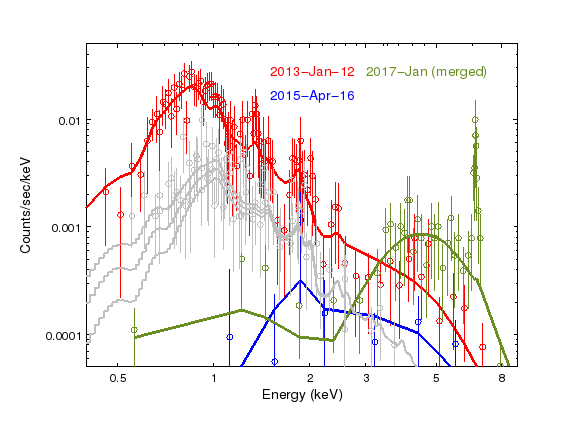

In [21]:
IPython.display.Image(filename=os.path.join(figout, 'spec.png'))

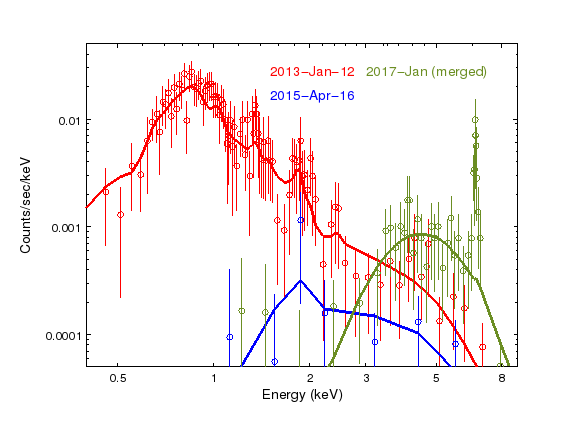

In [22]:
IPython.display.Image(filename=os.path.join(figout, 'spec_subtracted.png'))

We fit a spectral model. Because the 2015 observation yielded so few photons and the 2013 and 2017 observations peak at very different energies, strong assumptions are needed to fit comparable models. These fits do not reproduce all observed features, but are very instructive to compare the plasma properties.

Fits are done for source and background model, using data grouped to five counts per bin using the \texttt{chi2gehrels} statistic in sherpa \citep{2007ASPC..376..543D}.
The background of RW~Aur~A is due to the wings of the PSF from the brighter RW~Aur~B. Thus, we descibe the background with the same model used for RW~Aur~B in \citet{2014ApJ...788..101S}, which consists of two optically thin, thermal emission components in an APEC model and a cold photoelectric absorber. We fix absorbing column density, temperatures and abundances. Only the emission measure of is left free. We use the exact same parameters for the background in all four observations since the lightcurves show that the avarage flux is comparable in all cases.

To compare our new data to previous work we set the elemental abundances to be Ne enhanced by a factor of 1.4 and Fe depleted to 0.4 as fitted in \citet{2014ApJ...788..101S}. We constrain the spectral model as in \citet{2015A&A...584L...9S}, i.e.\ we use two optically thin, thermal emission APEC models where we fix the ratio of the emission meassure of the hot to the cool component to 1.3, and we fix the temperature of the cool component to 0.63~keV and the temperature of the hot component to 20~keV. 

\textbf{I used to have even more detail here about the background model I use etc. I decided that that's not needed. Waht do you think? Should this section go as well? I could just cite the numbers from the literature and don't need to fit it again here. I'd definitely leave the figure, but the text cold probably go...}

In [23]:
display_json_fit_results('spec_fit.json')

a1.nH: 0.0248 + 0.0368    nan
a2.nH: 2.5660 + 44.1373 -2.0056
a3.nH: 17.9816 + 8.5497 -5.5821
v11.norm turned into EM in units of 1e52: 0.7 + 0.1 -0.1
v21.norm turned into EM in units of 1e52: 0.3 + 2.3 -0.2
v31.norm turned into EM in units of 1e52: 5.3 + 2.8 -1.9


This model has six parameters: Absorbing column density and emission meassure for 2013, 2015, and 2017. The absorbing column density gives (0.02~(0-0.05), 2.6~(0.5-46), and 18~(12-26) in units of $10^{22}$~cm$^{-2}$, 
respectively for 2013, 2015, and 2017 and the emission measure of the cool component for the data from 2013, 2015, and 2017 is 0.7~(0.6-0.8), 0.3~(0.1-2.6), and 5~(3-8) in units of $10^{52}$~cm$^{-3}$.
The fitted models are shown in figure~\ref{fig:spec}. They describe the data well except in the region around 6.6~keV  in 2017.

## Discussion

The optical properties of RW~Aur~A in the new dimming event that started at the end of 2016 are similar to the previous dimming observed from 2014-2016. The $B-V$ and $V-R$ color are similar, and the depth of the dimming is 0.5~mag less than before. In fact, from optical observations alone, it is not clear if the new dimming is an unrelated event or just a continuation of the dimming that started in 2014 with just a short interruption in the absorbing material in between. On the other hand, in X-rays the properties of RW~Aur~A are dramamtically different. We see a much larger $N_\mathrm{H}$, a higher Fe abundance and more emission about 5~keV in 2017 than before.

The most obvious explanation for additional flux at high energies in an active star is a large coronal flare. However, the lightcurves during the observations in 2017 are almost flat. Looking at alternative explanations we first discuss the properties and location of the new absorbing material and later Fe abundance and plasma temperature.

\textbf{Currently, the discussion aims to be broad. Would it be better to focus on one aspect, e.g. the Fe abundance?}

### Can this be explained by the tidal stream?

\citet{2006A&A...452..897C} observed a stream of gas on the outer edge of the disk of RW~Aur~A. Modelling by \citet{2015MNRAS.449.1996D} showed that this might indeed be a tidal stream excited by the passage of RW~Aur~B and \citet{2013AJ....146..112R} suggested this scenario to explain the first dimming event in 2011. However, many of the features observed in the more recent dimming events can only be explained by changes of the inner disk and the disk wind close to the star \citep[e.g.][]{2015IBVS.6143....1S,2015A&A...577A..73P,2016ApJ...820..139T,2016A&A...596A..38F,2016MNRAS.463.4459B} and our observations point in the same direction: A streak of gas and dust passing by at a large distance from the star cannot induce the changes in the emission region needed to explain the increased hot emission and the Fe abundance. Strictly speaking, this does not rule out that the 2011 event was caused by the tidal stream passing through our line-of-sight and any later dimming is due to an unrelated mechnism, but given the long-term stability of the lightcurve before 2011 \citep{2013AJ....146..112R} that seems unlikely.

### Where does the absorbing column density come from?

In [24]:
radius = 10. * u.AU 
dens = (2.5e23*u.cm**(-2) / radius).to(u.cm**(-3))
v_wind = 10 * u.km/u.s
Mdot_wind = (np.pi * radius**2 * dens * 1.4 * aconst.u * v_wind).to(u.M_sun / u.year)
dens, Mdot_wind

(<Quantity 1671146780.5671113 1 / cm3>,
 <Quantity 4.333509352318064e-06 solMass / yr>)

In 2017, the fit indicates and absorbing column density of 38~(29-45)~$\times10^{22}$~cm$^{-2}$. We now assess where this material could be located. During the 2014-2016 fading, \citet{2016A&A...596A..38F} and \citet{2016ApJ...820..139T} detected increased ouflows as blue-shifted Ca~{\sc ii} absorption and they also see a much stronger [O~{\sc i}]~6300~\AA{} emission line, which is formed in the outflow. 
\citet{2016MNRAS.463.4459B} argue that this wind also carries the dust that causes the gray absorption. If this wind is strong close to the inner disk edge, at least the inner parts of the wind would be dust-free and could provide a large gas column density.

As an order of magnitude estimate, we assume a uniform wind emanating from the inner 10~au of the disk. In order to reach the measured $N_\mathrm{{H}}$ value along the line-of-sight, the density in that region has to be $2 \times 10^9\;\mathrm{cm}^{-3}$.
Even for a modest outflow velocity of only 10~km~s$^{-1}$ this would result in a mass loss rate of more than $2\times10^{-6}\;M_\odot\;\mathrm{yr}^{-1}$. If true, a new knot will emerge in the jet of RW~Aur very soon.
On the other hand, such a mass loss cannot be sustained for very long and would be significantly larger than that the mass accretion rate measured in the previous dimming \citep[][detect a reduced accretion rate in the photometrically dim state, but caution that the accretion region could be fully eclipsed in some way and thus unseen]{2016A&A...596A..38F}. Thus, a more plausible scenario is that the absorbing column density is located in the disk itself and is not outflowing. 

\citet{2006A&A...452..897C} observed the disk of RW~Aur~A in $^{12}\mathrm{CO}$ and $^{13}\mathrm{CO}$ lines. This allows them to place limits on the surface density of warm gas in the disk of $5\times10^{21}\;\mathrm{cm}^{-2} < N_\mathrm{H} < 10^{23}\;\mathrm{cm}^{-2}$. There might be an additional cold gas component in the disk mid-plane that is unseen in these observations, and indeed their limit on the disk surface density is significantly lower than our measured $N_\mathrm{H}$, so either we are looking parallel to the disk plane or we are looking through the disk and there is a large reservoir of cold gas in the mid-plane. The first scenario requires a massive disk asymmetry since the inclination of the disk is not edge-on (estimates vary between $45-60^\circ$ \citep{2006A&A...452..897C} and $77^\circ$ \citep{2013ApJ...766...12M}, possibly because the inner disk is warped as discussed in \citet{2016MNRAS.463.4459B}), the second seems unlikely because a cool disk region should contain some small dust grains, too, in contrast to the observed gray absorption (see discussion on the $A_V/N_H$ ratio in section~\ref{sect:nhav}).

In [25]:
n_H = np.zeros(3)
n_H_sig = np.zeros_like(n_H)

fit2017 = read_json_fit_results('spec_fe.json')
ind = fit2017['name'] == 'a1.nH'
n_H[2] = fit2017['val'][ind]
n_H_sig[2] = np.nanmean([fit2017['up'][ind], -fit2017['down'][ind]])

fitbefore = read_json_fit_results('spec_fit.json')
ind = fitbefore['name'] == 'a1.nH'
n_H[0] = fitbefore['val'][ind]
n_H_sig[0] = fitbefore['up'][ind]  # the other value is nan (interval goes down to 0)
                                   # Need to treat that in text, not in formula

ind = fitbefore['name'] == 'a2.nH'
n_H[1] = fitbefore['val'][ind]
n_H_sig[1] = np.nanmean([fitbefore['up'][ind], -fitbefore['down'][ind]])

n_H = n_H * 1e22
n_H_sig *= 1e22 / 1.654 # error are 90% conf. Turn this to 1 sigma

# Anders and Grevesse
Na_abund = 10**6.33 / 10**12
print (n_H, n_H_sig)
print (np.array([3e12,2e14]) / Na_abund)

[  2.48121446e+20   2.56598452e+22   3.82037787e+23] [  2.22607697e+20   1.39488676e+23   4.86136078e+22]
[  1.40320542e+18   9.35470283e+19]


Using the depth of several absorption lines, \citet{2016A&A...596A..38F} can place a limit on the gas phase column density of Na~{\sc i} which is $3\times10^{12}\;\mathrm{cm}^{-2} < N_\mathrm{Na} < 2\times10^{14}\;\mathrm{cm}^{-2}$. Using solar photospheric abundances, we can compare that to the X-ray derived $N_\mathrm{H}$. The upper limit from \citet{2016A&A...596A..38F} is compatible with the $N_\mathrm{H}$ from 2015, but is a factor of 25 below the $N_\mathrm{H}$ best-fit value in 2015 and than three orders of magnitude below the X-ray $N_\mathrm{H}$ in 2017 indicating that almost all of the Na in the line-of-sight is ionized.

The photoelectric cross-section of all atoms and ions in the line-of-sight contributes to the X-ray absorption in the gas phase and in small grains. This is expressed as equivalent hydrogen column density $N_H$, which is the total hydrogen column density of a gas with a solar abundance pattern that causes the same absorption that we observe. Different elements contribute at different energies and in high spectral resolution data the individual abundances can be measured from their absorption edges but our data is not good enough to do that. In the energy range between 2 and 3~keV where the observed flux drops (Figure~\ref{fig:spec}), O, Ne and Fe are the most important elements according to the photoelectric cross-sections of \citet{1992ApJ...400..699B}. If those elements are enhanced by e.g.\ one order of magnitude compared to solar abundances, then the true hydrogen column density is one order of magnitude lower than the equivalent hydrogen column density $N_H$ obtained from the fit. This reduces the required density and mass loss in a disk wind by the same factor.

### The $A_V/N_H$ ratio
\label{sect:nhav}
CTTS vary when the accretion rate changes or when they are absorbed by obsucing material. \citet{2016ApJ...820..139T} find that the veiling, a measure of how strongly the continuum from the accretion shock contributes to the optical flux, is actually stronger in the faint periods; X-shooter spectra from \citet{2016A&A...596A..38F} confirm this finding. On the other hand, \citet{2015A&A...577A..73P} observe no changes in the accretion close to the star. At the same time, photometry indicates that the extinction is gray up to at least $K$ band \citep{2015A&A...584L...9S,2015IBVS.6126....1A} in the faint state AB~Aur~A in 2015, while a selective $A_V=0.44$~mag is seen in the bright state \citet{2015IBVS.6126....1A}.

In [26]:
av = np.array([0.44, 2.3, 1.5])
av_sig = np.array([0.1, 0.4, 0.3])
print ('N_H', n_H)
print('N_H_SIG', n_H_sig)
n_H_sig = n_H_sig
print (n_H / av / 1e21, np.sqrt(n_H_sig**2/av**2+av_sig**2*n_H**2/av**2) / 1e21)

N_H [  2.48121446e+20   2.56598452e+22   3.82037787e+23]
N_H_SIG [  2.22607697e+20   1.39488676e+23   4.86136078e+22]
[   0.56391238   11.15645445  254.69185775] [  0.5090596   60.81121285  82.99676353]


In [30]:
10**(1.5/2.5)

3.9810717055349722

Using the $N_\mathrm{H}$ values from our fits and the $A_V$ values of 0.44~mag in the bright state and 2.7 (0.44~mag plus the $\Delta m_V=2.3$~mag between the bright state and the AAVSO photometry close to the 2015 \emph{Chandra} observation) and 1.9 (0.44 plus 1.5~mag) for the faint periods in 2015 and 2017 respectively, we find $N_\mathrm{H}/A_V$ of $0.6\pm0.5$, $11\pm60$, and $250\pm80$ in units of $10^{21}\;\mathrm{cm}^{-2}\;\mathrm{mag}^{-1}$ for 2013, 2015, and 2017. The uncertainties given are $1\sigma$ symmetric confidence intervals. This has to be compared to typical values of the ISM with  $1.8-2.2\times10^{21}\;\mathrm{cm}^{-2}\;\mathrm{mag}^{-1}$ \citep{1995A&A...293..889P}.

\citet{2003A&A...408..581V} compared $N_H$ and $A_V$ for six nearby star
forming regions, including the ONC. For the $\rho$~Oph star forming region they
find an $N_H/A_V$ significantly below the ISM value - the same trend that RW~Aur~A exhibits in its bright state.
They interpret this as a sign that the cloud material has a lower metal abundance than
the ISM, consistent with recent solar abundance measurements.
Alternatively, grain growth can increase the amount of extinction per unit mass
until the grains reach 1 $\mu$m in size \citep{2011A&A...532A..43O}.

As discussed above, the additional absorber in the dim phases of RW~Aur~A seems to be gray in the optical photometry; in other words, it is not wavelength selective, because it blocks the light completely. This can either be caused by a screen of large particles such as large dust grains or planetesimals. In the X-rays we do not know the true intrisic source flux. In the hard band, the flux is a few times larger when RW~Aur is optically faint than it was before. Thus, we cannot reference the previous observations to estimate the true flux, as we do in the optical. Instead, we only measure that wavelength selective extinction from the shape of the X-ray spectrum. It is possible that the gray absorber reduces the overall flux of X-rays as well and if true, the real X-ray flux might be 1.5~mag (a factor of four) larger than the observed flux. In that sense, our aborbing column density values $N_\mathrm{H}$ are lower limits to the total obscuration and therefore the derived  $N_\mathrm{H}/A_V$ values are only lower limits, too, even though the $N_\mathrm{H}/A_V$ values for 2015 and 2017 are already one and two orders of magnitude larger than the ISM value.

\citet{2008A&A...481..735G} analyzed older,
but still accreting classical T Tauri stars (CTTS) in low-mass star forming regions and found consistently
high $N_H/A_V$ ratios, indicating gas-rich material or massive grain growth - some
of these sources could be seen through the accretion column, which would be
dust-depleted due to the stellar irradiation. This argument places the additional absorber very close to the central star, where small grains evaporate. RW~Aur~A has a fairly large accretion rate, but there are no indications that the accretion accretion rate in the dim phases is two orders of magnitude larger than in the bright state \citep{2016A&A...596A..38F} to explain the increased abosrpbing column density.

\textbf{Long discussion with not very firm conclusions - there is jsut so much ambiguity betwene gas-dust ration and the dust compositions and grain size distribution... Ideas?}

### The extra emission measure

The lightcurves in figure~\ref{fig:lc} are mostly flat and the fact that a similar flux level was observed two days later again shows that the observations were not taken during a big flare. Thus, the increased emission at energies above 3~keV in 2017 compared to 2013 and 2015 (figure~\ref{fig:spec}) must be due to a different structure of the emission region.

The energy of emission from shock heated material is limited by the velocity jump across the shock front. For the mass and radius of RW~Aur~A \citep{2001ApJ...556..265W,2012AstL...38..167D}, the free fall velocity is $<500\;\mathrm{km s}^{-1}$, and thus the temperature of the shock $<0.3$~keV. The relatively soft X-rays observed by \citet{2014ApJ...788..101S} in the resolved jet show that shocks in the outflow reach similar temperatures. Since the temperature of the observed plasma in 2017 is considerable larger, it must be magnetically heated. (A shock heated component might be present, but hidden due to the large absorbing column density).

### The Fe abundance

The best fit in section~\ref{sect:2017} shows an Fe abundance comapred to solar of 10~(90\% confidence lower limit:2.4; upper limit $>1000$) and a volume emission measure of $VEM = \int n n_e \mathrm{d}V = 150\;(20-290)\;\times10^{52}$~cm$^{-3}$, where the $n$ is the denisty of ions and atoms and $n_e$ is the electron density integrated over the emitting volume.

In [41]:
abund = 10
dens = 1e9 * u.cm**(-3)
V = 150e52*u.cm**(-3) / dens/ (1.4 * dens)
(V * dens * 10**7.5/10**12 * abund * 55.8 * u.u).to(u.M_earth)

<Quantity 5.254927446259756e-09 earthMass>

In [31]:
(u.M_sun * 0.03 * 10**7.5/10**12).to(u.M_earth)

<Quantity 0.31586253358646793 earthMass>

An increase in iron abundance is not compatible with the properties of an active stellar corona. There is some element differentiation in coronae, where elements of low first ionization potential (FIP) such as Fe are enhanced in stars with low activity and depleted in stars with a high activity level \citep[see review by][and references therein]{2004A&ARv..12...71G}. RW~Aur~A had a low Fe abundance in 2013, which is compatible with this picture. However, in 2017 there is significantly more emission at high temperature, indicating a higher level of activity and thus the Fe abundance should have decreased and not increased.
We can however use the $VEM$ and abundance to estimate the total mass of iron in the emitting material, which is inversely proportional to the density we assume. For $n=10^6\;\mathrm{cm}^{-3}$, only about $10^{-5}$ earth masses of iron are required in the emitting plasma. Since the plasma temperature rules out an origin in the accretion shock, any accreted mass must be transferred to the corona in some way. Observations of RS~CVn EI~Eri suggest that the time scale of element fractionation in active regions is a few days \citep{2013A&A...550A..22N}; similarly, the time scale on which mass lost to the solar wind is replaced is one to two days \citep{2015LRSP...12....2L}. Assuming that this time scale is also a reasonable estimate for the time that accreted iron remains in the corona before it is mixed in the convective zone or ejected into the stellar wind and assuming that the abundace we observe is typical for the most recent dimming starting in 2016, about $10^{-3}$ earth masses of iron have passed through the corona. A large planetesimal could easily supply this reservoir. On the other hand, at an age $<10$~Myr \citep{2001ApJ...556..265W} the convection zone of RW~Aur~A is still so deep that is contains about half of the total stellar mass \citep{2011ApJ...743...24S}. Any iron rich material accreted will be mixed in one convective turn-over time without significantly changing the photospheric abundance.

### Planetesimal break-up in the inner disk

We are looking for a unified model that explains the absorption, Fe abundance and increased volume of magnetically heated plasma.
Circumstellar disks are the sites of planet formation. As part of this process, dust grains coaggluate into larger aggregates and eventually planetesimals and planets. When two such particles collide, they may either stick together or break apart and if the mass of the planetesimal or planet is large enough, that will change the dynamics of the inner disk particularly if the intial orbit was eccentric or inclined with repect to the disk. Particles released in the break-up are initially very concentrated, but spread out over the orbit due to differential rotation in a Keplarian disk and spiral waves. A possible scenario is that such a break-up happened some time before 2011. A small part of the cloud of debris passed through our line-of-sight and caused RW~Aur~A to dim for aobut 100~days. In 2014 the cloud passed the line-of-sight again, but by this time it had spread to cover a larger range of radii in the disk, leading to an almost continuous screening of RW~Aur, except for a small window in 2016.

In [39]:
(((15 * u.yr)**2 * aconst.G * 1.4 * u.M_sun / 4 / np.pi)**(1/3)).to(u.AU)

<Quantity 9.96601642485518 AU>

In a Keplarian disk around RW~Aur~A, a period of three years corresponds to a disk radius of 3~AU. The X-ray spectrum taken in 2015 did not show any peculiar Fe feature and emission in general was fainter than in 2017. Either accretion of Fe is intermittant, or it took until 2017 for the first breakup products to migrate towards the inner disk to be accreted. A change in composition and mass at the inner disk edge must also change the coupling to the stellar magnetic field, which conceivably could cause the coroanl density or volume to increase. Pebbles and large grains released in the break-up or dretched up from the disk mid-plane by gravitational disturbance will cause gray extinction because they are too large to cause wavelength selective absorption.

While accretion of a terrestial planet has never been observed directly in young stars, there are several white dwarfs whose surface abundances show slear signatures of ongoing accretion of debris from a terrestrial planet \citep{2011ApJ...732...90M,2012MNRAS.424..333G}. In a few Herbig Ae/Be stars (the more massive bretheren of CTTS), \citet{2015A&A...582L..10K} observe photospheric abundances where refractory elements such as Fe are depleted. They conclude that grains must be accumulating in some planetary body, while the gas passes through the disk and is accreted onto the star. If a collision destryos such a planet, refractory elements may appear in the corona temporarily as we observe it in RW~Aur~A.

\textbf{Include section on binarity here? It has been suggested that RWAur A is in fact an unresolved binary Aa and Ab. I don't think that's very likely, because it's resolved down to 10 au in lucky imaging. Thus, the binary must be either very small (then it's unlikely that it contributes much in X-rays, too) or very absorbed, let's say nh = 1e23 = Av > 10. In that case the new spectrum could be the spectrum of the binary, but then we have to ask wht that Fe line was not seen before, why don;t we see the Aa star now and also where do we hide that much of a disk? RW Aur A has be follwed by https://arxiv.org/pdf/1702.08583.pdfto reconstruct the orbit and they don't see indications for a third memeber i nthe system either.}

\textbf{Any other scenario you cna think of for discussion?}

## Summary
We present new \emph{Chandra} data of the binary RW~Aur. The resolved binary member RW~Aur~A had several optical dimming events in the past. Previously published \emph{Chandra} data shows RW~Aur~A in an optically bright state and in a previous dimming event. We find that RW~Aur~A has an exceptionally high absorbing colum density of a few $10^{23}\;\mathrm{cm}^{-2}$, more than in the previous optical dimming event and orders of magnitude more than in the optically bright state. We also see significantly enhanced emission in the hard X-ray range above 3~keV and an Fe emission feature at 6.6~keV that indicates an Fe abundance one order of magnitide above solar. The temperature of the plamsa is too high to be shock-heated; the most plausible location for it is an active corona. Significant accretion of Fe rich material is required to boost the abundance to the observed value. We specualte that the break-up of a terrestial planet or at least a large planetesimal might supply the gray extinction seen in the optical, the large amount of gas column density observed as $N_\mathrm{H}$ in X-rays and also provide the iron in the accretion stream to enhance coronal abundances.

\textbf{Obviously, summary and abstract need to be adjusted if we change te focus of the discussion.}


\acknowledgments
The scientific results reported in this article are based on observations made by the Chandra X-ray Observatory. We acknowledge with thanks the variable star observations from the AAVSO International Database contributed by observers worldwide and in particular the BAAVSS. This research has made use of software provided by the Chandra X-ray Center (CXC) in the application packages CIAO, ChIPS, and Sherpa. Support for this work was provided by the National Aeronautics and Space Administration through Chandra Award Numbers DD5-16077X and GO6-17021X issued by the Chandra X-ray Observatory Center, which is operated by the Smithsonian Astrophysical Observatory for and on behalf of the National Aeronautics Space Administration under contract NAS8-03060.

\textbf{It's still early, but please send me your acknowledgement so we don't forget about it later...}

\vspace{5mm}
\facilities{CXO(ACIS,ACA), AAVSO}

%% Similar to \facility{}, there is the optional \software command to allow 
%% authors a place to specify which programs were used during the creation of 
%% the manusscript. Authors should list each code and include either a
%% citation or url to the code inside ()s when available.

\software{astropy \citep{2013A&A...558A..33A},
          CIAO \citep{2006SPIE.6270E..60F},
          Sherpa \citep{2007ASPC..376..543D}
          }

\bibliographystyle{../AAStex/v611/aasjournal}
\bibliography{../articles}

\end{document}

Invite 	Dubois, Franky as co-author, because responsible for 153 pointso nlightcurve, incl the recent crucial B and R (http://www.digilife.be/club/franky.dubois/ or chanatc through AAVSO office)